# Connectionist Neurons and Multi Layer Perceptrons

## T2.1 Terminology

1. a connectionist neuron computes any input into a binary output. 
 1. Itself is a mathematical function that computes the weighted average of its input, 
 - sum is passed through a nonlinear function (activation function => sigmoid function)
 
Further explanation: A neuron consists of a function f(x1, x2, ..., xn), a sigmoid function which uses f as input and gives a binary output and a weight factor which is multiplied with with the sigmoid function and determines how much this neuron is considered for the output of the layer. 
![alt](data/neuron.png)

2.) The effects of the weights and bias 
1. bias allows you to shift the activation function to the left or right (critical for successful learning
2. weights are parameters to adjust our learning function. They get adjusted during training towards the right output. 

Further explanaition: Weights are initiallized randomly. 

3) Why is a non linear transfer function beneficial compared to a linear one?

4) What is a feedforward multilaywer perceptron (MLP)?

## H2.1 Connectionist Neuron

In [1]:
# Setup dependencies
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd

In [2]:
# load data
df = pd.read_csv('data/applesOranges.csv').astype(float)
df.describe()

,x.1,x.2,y
count,200.000000,200.000000,200.000000
mean,0.252160,0.241115,0.500000
std,0.560932,0.577747,0.501255
min,-1.335000,-1.032000,0.000000
25%,-0.137000,-0.193000,0.000000
50%,0.219500,0.256000,0.500000
75%,0.621000,0.661750,1.000000
max,2.059000,1.610000,1.000000


In [3]:
df.head()

,x.1,x.2,y
0,0.365,0.708,0.0
1,0.543,-0.268,0.0
2,-0.401,0.643,0.0
3,0.866,-0.796,0.0
4,-0.386,0.742,0.0


In [4]:
df.tail()

,x.1,x.2,y
195,0.784,0.616,1.0
196,0.411,-0.005,1.0
197,0.930,0.225,1.0
198,1.288,0.184,1.0
199,0.110,1.114,1.0


In [5]:
df.dtypes

x.1    float64
x.2    float64
y      float64
dtype: object

In [6]:
# split data
X = df.drop('y', axis=1).values
y = df.y

### a.)

In [7]:
def plot_line(axes, data, title, color='red',x_label='',y_label=''):
    x_y = np.array(data).T
    axes.plot(x_y[0], x_y[1])
    axes.set_title(title)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    axes.grid()
    

In [8]:
def plot_scatter(axes, X1,X2, title, colors):
    axes.scatter(X1, X2, color=colors, s=50)
    
    axes.set_xlabel("$x_1$")
    axes.set_ylabel("$x_2$")
    axes.set_title(title)
    axes.set_xlim([-2.5,2.5])
    axes.set_ylim([-1.5, 2])
    axes.grid()


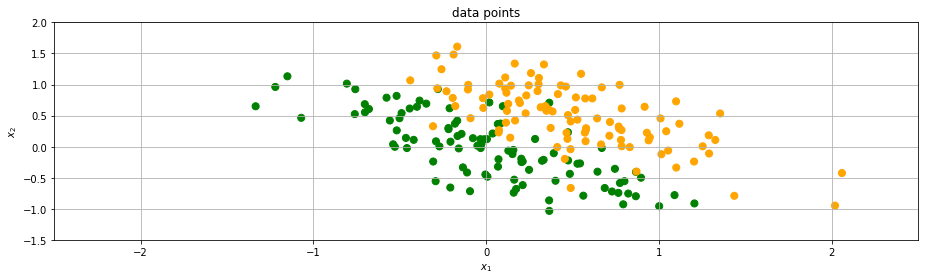

In [9]:
colors = ['orange' if label==1 else 'green' for label in y]
figure, axes = plt.subplots(1, 1, figsize=(13, 4))
X1 = X[:,0]
X2 = X[:,1]
plot_scatter(axes,X1,X2,title='data points', colors=colors)
figure.tight_layout()

### b)

In [10]:
# gets weight and 
def create_weight(angle):
    rad = np.radians(angle)
    # print('rad={} for alpha: {}'.format(rad,alpha))
    weight = np.array((np.cos(rad), np.sin(rad)))
    # print('weight={} for alpha: {}'.format(weight,alpha))
    return weight

In [11]:
# modified sign function (activation function)
def f(x, w, theta): 
    return (np.sign(w.dot(x) + theta) + 1) / 2

In [12]:
def calculate_error(y, x, w, theta):
    error = np.abs(y - f(x, w, theta))
    return error

In [13]:
def calculate_performance(errors):
    performance = np.average([1 - round(e) for e in errors])
    return performance

In [14]:
# convert dataframe into numpy array
data = df.values

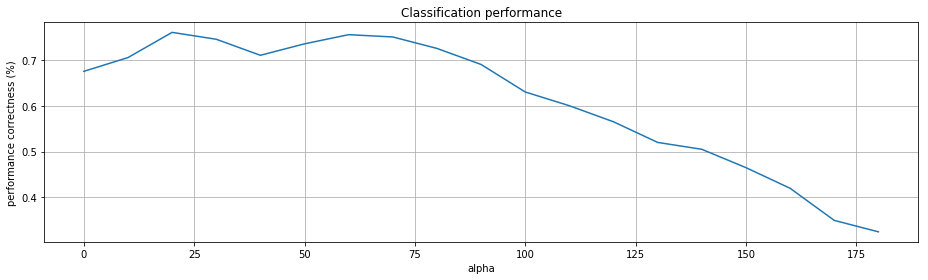

In [15]:
theta = 0
alphas = range(0,181,10)
performances = []

for alpha in alphas:
    w = create_weight(alpha)
    # calculate error for all features with the label
    errors = [calculate_error(y, (x1,x2), w, theta) for x1,x2,y in zip(data[:,0], data[:,1],y)]
    performance = calculate_performance(errors)
    performances.append( (alpha, performance) )
    
figure, axes = plt.subplots(1, 1, figsize=(13, 4))
plot_line(axes, performances, title='Classification performance', x_label='alpha',y_label='performance correctness (%)')
figure.tight_layout()

## c)

In [16]:
# get alpha with best performance 
alpha = max(performances, key = lambda x: x[1])[0]
alpha

20

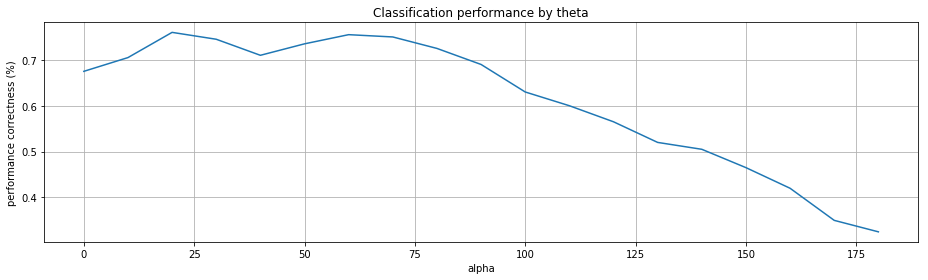

In [17]:
# Exercise 1.c
thetas = range(-3, 4) # -3 to 3
w = create_weight(alpha)
performances_theta = []

for theta in thetas:
    errors = [calculate_error(yT, (x1,x2), w, theta) for x1,x2,yT in data]
    performance = calculate_performance(errors)
    performances_theta.append((theta, performance))
    
figure, axes = plt.subplots(1, 1, figsize=(13, 4))
plot_line(axes, performances, title='Classification performance by theta', x_label='alpha',y_label='performance correctness (%)')
figure.tight_layout()

## d)

Parameters: Alpha = 20, Theta = 0, Error rate = 0.24


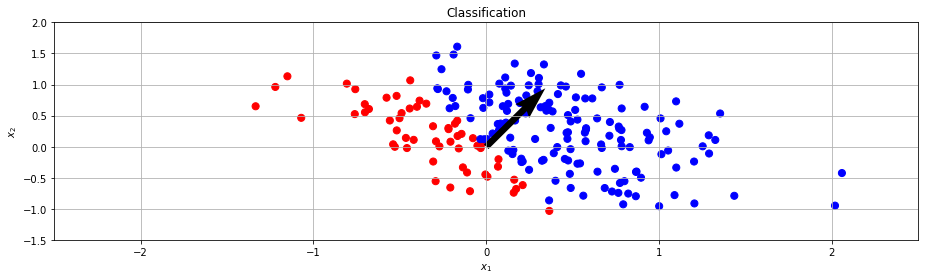

In [23]:
# get best performance thaeta and alpha
theta = max(performances_theta, key = lambda x: x[1])[0]
alpha = max(performances, key = lambda x: x[1])[0]
w = create_weight(alpha)

classification = [f((x1,x2), w, theta) for x1, x2, yT in data]
# calculate average error 
errors = [calculate_error(yT, (x1,x2), w, theta) for x1, x2, yT in data]
eT = np.average(errors)

# plot scatter
colors = ['red' if x==0 else 'blue' for x in classification]
figure, axes = plt.subplots(1, 1, figsize=(13, 4))
X1 = data[:,0]
X2 = data[:,1]
plot_scatter(axes, X1, X2, title='Classification', colors=colors)
axes.quiver(0, 0, w[1], w[0], angles='xy', scale_units='xy', scale=1)
figure.tight_layout()

print('Parameters: Alpha = {}, Theta = {}, Error rate = {}'.format(alpha, theta, eT))

![classifier](data/classifier.png)

## Interpretation
Weight vector defines if a datapoint is on the left or the right side of it. In the end the scalara product of the weighting vector on a data point returns a positive or a negative number.
By applying the sign function to the return value you get one of two possible values defining the label of the given data point.

The optimized parameters alpha and theta define the weight vector such that the resulting separating line is close to the optimal solution. Because there is only one applied connectionist neuron there is only a linear separating line which doesn't fit exactly to the given measurements. 

## e)

Best parameters: Alpha = 45, Theta = -0.40, Error rate = 0.09


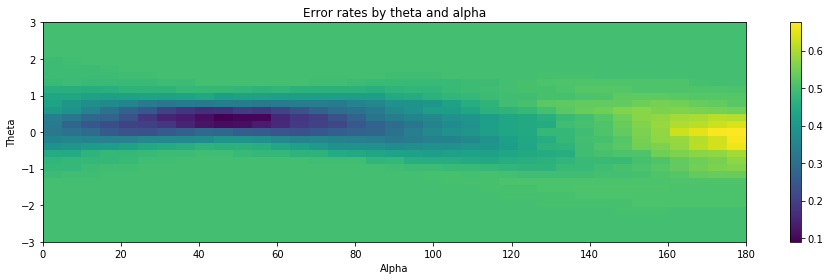

In [19]:
thetas = np.arange(-3, 3.1, 0.2)
alphas = range(0, 181, 5)
results = []
min_value = 1
best_params = None

for alpha in alphas:
    w = create_weight(alpha)
    row = []
    for theta in thetas:
        error = [calculate_error(yT, (x1, x2), w, theta) for x1, x2, yT in data]
        eT = np.average(error)
        row.append(eT)
        if eT < min_value:
            best_params = (alpha, theta)
            min_value = eT
    results.append(row)


figure, axes = plt.subplots(1, 1, figsize= (13, 4))
cax = axes.imshow(np.array(results).T, extent=[0, 180, -3, 3], aspect='auto')
figure.colorbar(cax)
axes.set_title('Error rates by theta and alpha')
axes.set_ylabel('Theta')
axes.set_xlabel('Alpha')
figure.tight_layout()

print('Best parameters: Alpha = {}, Theta = {:.2f}, Error rate = {}'.format(*best_params, min_value))

## f)
The optimization method cannot be used for any classification problem. 
The problem rises with too many parameters to explore. 

Here we use only one connectionist neuron, so we are able to execute a linear classification. The separating line is only a linear function --> so there is no right classification for some points like a cloud of points.

If we have a dataset which can be classified by a nonlinear function like a quadratic function we would get even worse results tthat for the given example, because we cannot reproduce the separating line with a linear classification.  

Original Answer:
Grid search fails in high dimensional input spaces, as the number of measured combinations grows exponential in the inputs dimensionality (e.g. pixel images --> millions of weights)

## 2.a)

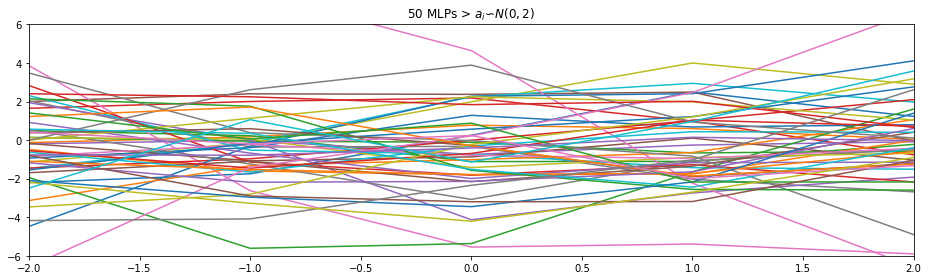

In [20]:
# set random values for w,a,b = 1,...,10
# a follows a normal distribution with expected value 0 and standard deviation of 2
# w follows a normal distribution with expected value -2 and standard deviation of 2

# transfer or activation function
# tanh

def y(w,alpha,activation_function, x,theta):
    return np.sum(w * activation_function(alpha * (x - theta) ) )
                  
def generate_mlps(alpha_variance, activation_function=np.tanh, count=50, nodes=10, X=np.arange(-2, 3, 1) ):
    mlps = [ (np.random.normal(loc=0, scale=1, size=nodes),
        np.random.normal(loc=0, scale=alpha_variance, size=nodes),
        np.random.uniform(-2, 2, nodes) )
        for _ in range(count) ]
    Y = [ ( [y(w,a,activation_function, x, b) for x in X], w,a,b) for w,a,b in mlps ]
    return [ (list(zip(X,y)), w, a, b) for y,w,a,b in Y ]


                  
mlps = generate_mlps(2, np.tanh, 50)
                  
# plot input output functions of 50 MLPs for x element of [-2,2]
figure, axes = plt.subplots(1,1,figsize=(13,4))
for x_y, _, _, _ in mlps:
    color = np.random.rand(3,1)
    plot_line(axes, x_y, title=r'50 MLPs > $a_i \backsim N(0, 2)$',color=colors)
    axes.set_xlim([-2,2])
    axes.set_ylim([-6, 6])
figure.tight_layout()

## b)

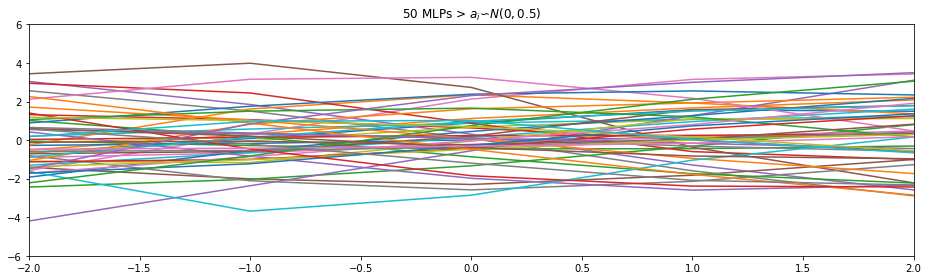

In [21]:
mlps_c = generate_mlps(0.5, np.tanh, 50)
                  
# plot input output functions of 50 MLPs for x element of [-2,2]
figure, axes = plt.subplots(1,1,figsize=(13,4))
for x_y, _, _, _ in mlps_c:
    colors = np.random.rand(3,1)
    plot_line(axes, x_y, title=r'50 MLPs > $a_i \backsim N(0, 0.5)$',color=colors)
    axes.set_xlim([-2,2])
    axes.set_ylim([-6, 6])
figure.tight_layout()

## c) 

MLP y_1(x):
	MSE=0.30
	w=[0.958, -0.98, 0.548, 0.929, 0.424, 0.016, 0.007, -0.17, -0.61, -1.09]
	a=[3.232, 2.243, -1.43, 1.665, -0.49, 1.094, 0.375, 4.271, 1.689, 1.917]
	b=[0.458, 0.348, 0.182, -0.28, 1.057, -1.31, 0.088, -0.67, -0.03, -1.06]

MLP y_2(x):
	MSE=0.05
	w=[0.662, -0.05, -0.4, 1.797, 0.247, 0.192, 0.223, 0.374, 0.548, 0.245]
	a=[-0.86, -0.39, 0.823, -0.74, 0.428, 0.505, 0.029, -0.63, -0.04, 1.174]
	b=[-1.86, 1.74, -1.76, 0.75, -0.7, -0.0, 1.522, -1.41, 0.202, -1.57]



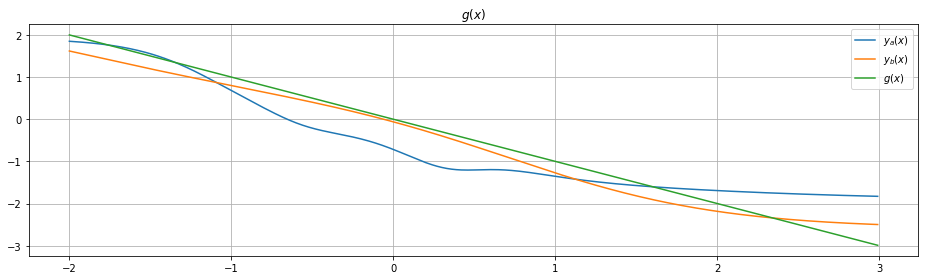

In [22]:
def g(x):
    return -x

def mean_squared_error(G, Y):
    return np.average( [ (y[1] - g[1])**2 for g, y in zip(G, Y)] ) 

X = np.arange(-2, 3, 0.01)
G = [(x, g(x)) for x in X]

mlps = generate_mlps(2, X=X)
# dim 50,5
squared_error_a = [ ( mean_squared_error(G,Y), Y,w,a,b) for Y, w, a, b in mlps]

mlps = generate_mlps(0.5, X=X)
squared_error_b = [ ( mean_squared_error(G,Y), Y,w,a,b) for Y, w, a, b in mlps]

best_mlp_a = min(squared_error_a, key=lambda x: x[0])
best_mlp_b = min(squared_error_b, key=lambda x: x[0])

figure, axes = plt.subplots(1,1, figsize=(13,4))
plot_line(axes, best_mlp_a[1], title=r'$y_a(x)$', color='blue')
plot_line(axes, best_mlp_b[1], title=r'$y_b(x)$', color='red')
plot_line(axes, G, title=r'$g(x)$', color='green')
axes.legend([r'$y_a(x)$', r'$y_b(x)$', r'$g(x)$'])
figure.tight_layout()

w, a, b = [[float(str(x)[:5]) for x in param] for param in best_mlp_a[2:]]
print('MLP y_1(x):\n\tMSE={:.2f}\n\tw={}\n\ta={}\n\tb={}\n'.format(best_mlp_a[0], w, a, b))
w, a, b = [[float(str(x)[:5]) for x in param] for param in best_mlp_b[2:]]
print('MLP y_2(x):\n\tMSE={:.2f}\n\tw={}\n\ta={}\n\tb={}\n'.format(best_mlp_b[0], w, a, b))